# Clustering Songs by Mood

Music is a medium that conveys emotion or a mood. People usually listen to songs that align with the mood that they are feeling. In this first part of my project, I'll create playlists from my personal spotify songs which I obtained through the Spotify API. You can see the code for this in notebook 2. Spotify API Data Gathering. 

Let's import our personal data obtained from the Spotify API. 

In [1]:
import pandas as pd
import numpy as np
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE


import seaborn as sns
#set style of plots
sns.set_style('darkgrid')

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# import the csv we obtained from notebook 2
songs_df = pd.read_csv('mysongsdf.csv')
songs_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Autumn Leaves - Deluxe Edition,0.89200,0.555,0.257,0.1240,-12.637,0.0299,89.013,0.431
1,I'm Not The Only One,0.56200,0.515,0.494,0.0771,-5.780,0.0416,81.329,0.474
2,If I Ever Feel Better,0.04920,0.755,0.553,0.0646,-9.449,0.1070,119.700,0.836
3,Electric Love,0.00448,0.621,0.853,0.2360,-6.537,0.0615,120.017,0.650
4,lovers’ carvings,0.68000,0.558,0.470,0.5320,-5.500,0.0316,118.060,0.427


In [3]:
# see basic stats
songs_df.describe()

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.278149,0.591823,0.598676,0.175615,-7.500077,0.068941,118.518327,0.472351
std,0.289117,0.149989,0.204575,0.142033,3.098313,0.073549,28.205665,0.230041
min,0.000139,0.192000,0.076800,0.024800,-20.284000,0.024600,60.042000,0.054400
25%,0.037150,0.503250,0.460500,0.096675,-9.142500,0.033700,97.070250,0.289500
50%,0.161000,0.596500,0.627000,0.118000,-7.035500,0.043300,118.150500,0.433000
75%,0.453000,0.696250,0.757250,0.201250,-5.280000,0.066125,137.887250,0.650000
max,0.977000,0.946000,0.966000,0.912000,-1.542000,0.681000,217.987000,0.974000


We'll drop energy, valence, and tempo because they are very highly correlated with mood and will cause overfitting.

In [4]:
songs_df2 = songs_df.drop(['energy','valence','tempo'],axis=1)
songs_df2.head()

,track,acousticness,danceability,liveness,loudness,speechiness
0,Autumn Leaves - Deluxe Edition,0.89200,0.555,0.1240,-12.637,0.0299
1,I'm Not The Only One,0.56200,0.515,0.0771,-5.780,0.0416
2,If I Ever Feel Better,0.04920,0.755,0.0646,-9.449,0.1070
3,Electric Love,0.00448,0.621,0.2360,-6.537,0.0615
4,lovers’ carvings,0.68000,0.558,0.5320,-5.500,0.0316


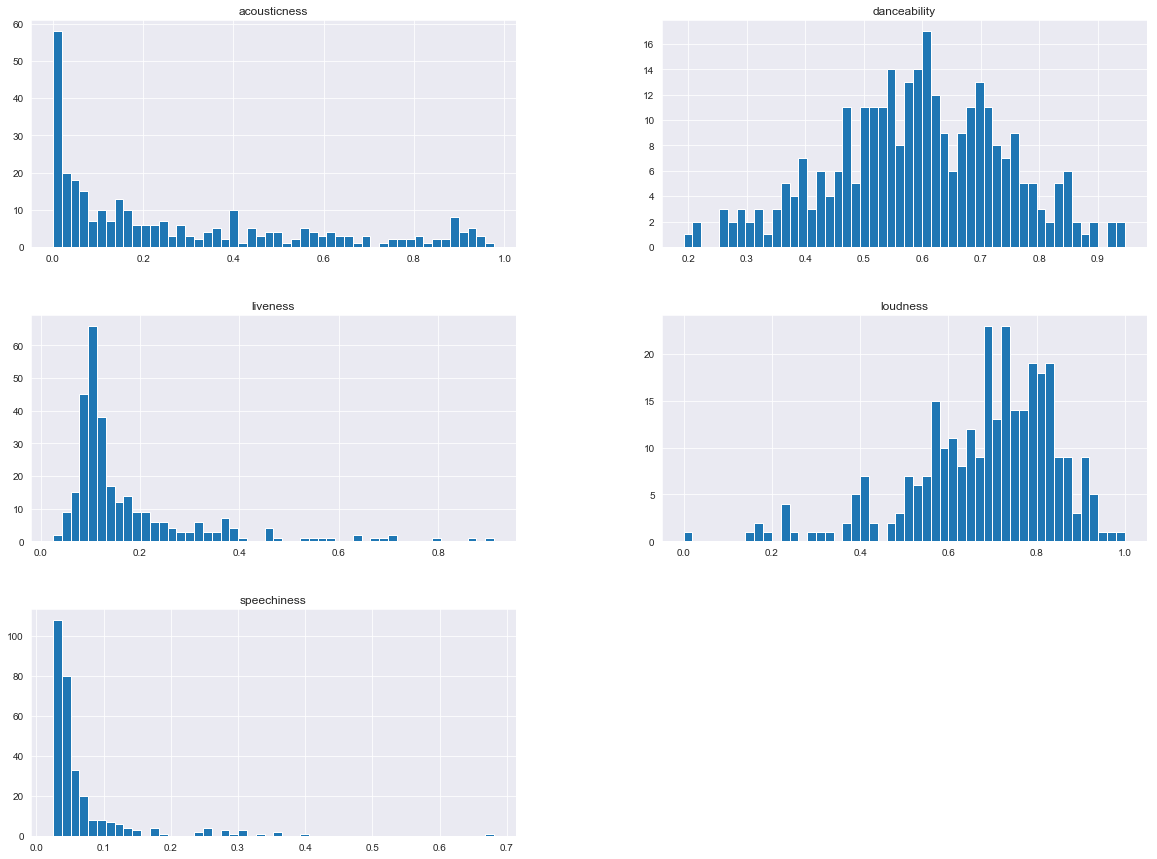

In [5]:
# scale loudness to be between 0 and 1
loudness = songs_df2[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs_df2['loudness'] = pd.DataFrame(loudness_scaled)

songs_df2.hist(bins=50,figsize=(20,15));

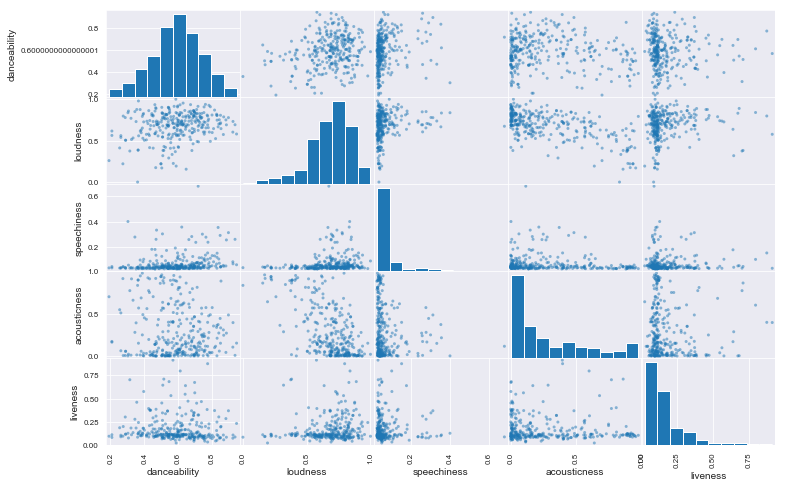

In [6]:
# attributes should contain the features we want to compare
attributes = ['danceability','loudness','speechiness','acousticness','liveness']

scatter_matrix(songs_df2[attributes],figsize=(12,8));

In [7]:
# remove song names before clustering
features = songs_df2.copy()
features = songs_df2.drop(['track'],axis=1)

In [8]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

In [9]:
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.454959538282729)
For n_clusters = 3, silhouette score is 0.31287428586608856)
For n_clusters = 4, silhouette score is 0.286957226770609)
For n_clusters = 5, silhouette score is 0.24894066602501003)
For n_clusters = 6, silhouette score is 0.23620138311784417)
For n_clusters = 7, silhouette score is 0.23356472763244482)
For n_clusters = 8, silhouette score is 0.22545401812370888)
For n_clusters = 9, silhouette score is 0.22873136217064466)
For n_clusters = 10, silhouette score is 0.2259564078037111)
For n_clusters = 11, silhouette score is 0.20858047502845842)
For n_clusters = 12, silhouette score is 0.2154505959547691)
For n_clusters = 13, silhouette score is 0.21210323380765325)
For n_clusters = 14, silhouette score is 0.22207450520095093)


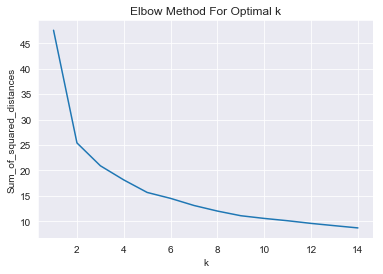

In [10]:
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
y_kmeans = kmeans.predict(features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

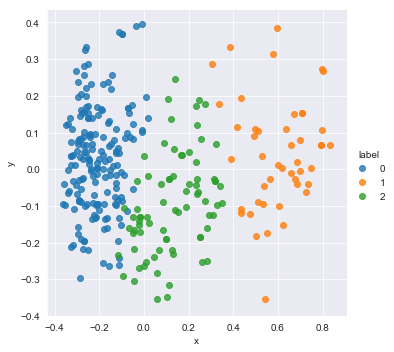

In [13]:
# create dataframe with our pca components
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

PCA is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances. In other words, things that are different end up far apart. This can lead to poor visualization especially when dealing with non-linear manifold structures. This is why we will also use t-SNE. 
<br/><br/>

T-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance. The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function.

In [14]:
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(features)

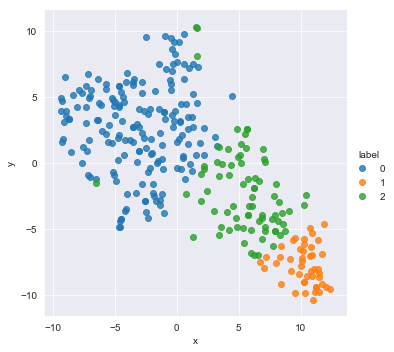

In [15]:
# create dataframe with our t-sne components
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [16]:
pca.explained_variance_ratio_

array([0.60860803, 0.14626604])

In [17]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=features.columns,index = ['PC-1','PC-2']))

      acousticness  danceability  liveness  loudness  speechiness
PC-1      0.913457     -0.098885 -0.041718 -0.390824    -0.036540
PC-2     -0.212415     -0.920711  0.148932 -0.268877    -0.112674


In [18]:
songs_df['label'] = y_kmeans

# shuffle dataset

songs_df = songs_df.sample(frac=1)
songs_df['label'].value_counts()

0    177
2     77
1     46
Name: label, dtype: int64

## My Personal Playlists based on K Means Clustering

Let's see our different playlists created from our clustering!
<br/><br/>
This first playlist tends to have a lot of songs that I groove to when I am in a cheerful/upbeat mood.

In [19]:
songs_df[songs_df['label'] == 0] # chill playlist

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
197,Swallowed in the Sea,0.055700,0.290,0.378,0.1190,-10.823,0.0317,142.123,0.153,0
104,Back Down South,0.063400,0.476,0.619,0.2580,-7.221,0.0398,117.113,0.154,0
115,The Way,0.143000,0.646,0.882,0.3350,-5.648,0.0346,120.837,0.908,0
131,High And Low,0.019300,0.508,0.782,0.0890,-4.667,0.0454,126.917,0.286,0
218,Miracle,0.015100,0.577,0.781,0.1790,-3.154,0.0315,124.012,0.424,0
5,You’re Not The One,0.002150,0.468,0.966,0.1320,-3.468,0.0557,92.002,0.800,0
102,Sober,0.097200,0.699,0.601,0.5620,-6.480,0.0304,98.040,0.434,0
80,"All My Loving - From ""Across The Universe"" Sou...",0.050100,0.435,0.494,0.3740,-8.312,0.0863,104.826,0.417,0
291,Land Of Pleasure,0.000257,0.472,0.725,0.1060,-6.784,0.0403,76.523,0.171,0
81,Swallowed in the Sea,0.055700,0.290,0.378,0.1190,-10.823,0.0317,142.123,0.153,0


This second playlist has a lot of songs I tend to listen to when I am in a more chill, or focused mood. These are soothing tunes that tend to have a lot of acoustic sounds.

In [20]:
songs_df[songs_df['label'] == 1] # energetic playlist

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
57,Cherry Wine - Live,0.957,0.504,0.0768,0.0928,-17.099,0.0378,130.654,0.2450,1
12,Oceans (Where Feet May Fail),0.508,0.262,0.3610,0.1080,-10.187,0.0333,126.786,0.0560,1
91,Try,0.807,0.603,0.3760,0.1080,-9.770,0.0288,139.995,0.5380,1
257,Hell & Back,0.685,0.382,0.4980,0.1140,-8.514,0.0377,181.881,0.0690,1
98,I Will Follow You Into The Dark,0.924,0.517,0.2060,0.1180,-12.233,0.0421,80.401,0.4890,1
87,Make You Feel My Love,0.910,0.325,0.1800,0.1130,-10.647,0.0311,72.416,0.0997,1
40,Skinny Love,0.843,0.565,0.2570,0.1090,-14.040,0.0579,76.493,0.1110,1
44,Broken Brights,0.664,0.689,0.3240,0.0967,-11.636,0.0293,160.080,0.4410,1
27,Beautiful Girl,0.860,0.648,0.1700,0.1130,-17.375,0.0407,110.653,0.3280,1
24,First Day Of My Life,0.915,0.468,0.2010,0.0952,-17.024,0.0388,94.422,0.3830,1


This third playlist is filled with energetic songs that are bops in my personal opinion! I'll call this my energetic playlist!

In [21]:
songs_df[songs_df['label'] == 2] # cheerful Playlist

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
92,Sure Thing - Spotify Sessions,0.600,0.613,0.470,0.7960,-4.547,0.1010,138.134,0.4130,2
284,Elephant,0.562,0.598,0.553,0.2570,-6.742,0.0397,123.075,0.5330,2
233,Feel Good Inc.,0.212,0.779,0.634,0.1100,-7.975,0.0607,124.047,0.5760,2
180,The Trouble with Us,0.338,0.828,0.744,0.1580,-4.932,0.0646,121.090,0.8310,2
250,I Do (feat. SZA),0.270,0.886,0.473,0.0864,-7.338,0.2550,135.065,0.4380,2
240,Jazz,0.250,0.636,0.610,0.1130,-9.665,0.1190,125.227,0.2960,2
13,Mr Quiche,0.539,0.501,0.635,0.1730,-6.699,0.0383,79.974,0.1410,2
210,Better Not (feat. Wafia),0.278,0.783,0.537,0.2290,-2.921,0.0749,113.977,0.3920,2
95,All This Time,0.433,0.413,0.374,0.1110,-10.744,0.0321,144.930,0.1050,2
294,I Blame Myself,0.350,0.692,0.739,0.3200,-4.122,0.0374,115.014,0.8190,2


Now that we have clustered my music into three distinct playlists, let's see if we can use machine learning to classify my mood based on the tracks I listen to! 
<br/><br/>
By determining a listener's mood, it is easier to recommend tracks of a similar mood to keep the user engaged. 

# Machine Learning to Predict Mood Labels

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

# For Deep learning
from sklearn.neural_network import MLPClassifier

# Define the target and variables
X = features
y = y_kmeans

# Split into training and testing data, we will use a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Random Forest Classifier

In [23]:
# Fit Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [25]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[55  0  1]
 [ 0 14  2]
 [ 0  0 18]]


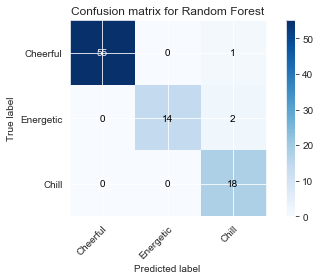

In [26]:
# Confusion matrix
definitions = ['Cheerful','Energetic','Chill']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [27]:
# View features and their importance scores
features_rfc = features.columns
list(zip(features_rfc, rfc.feature_importances_))

[('acousticness', 0.6758886292615112),
 ('danceability', 0.07867017206353444),
 ('liveness', 0.041492463840699705),
 ('loudness', 0.16497602443489104),
 ('speechiness', 0.038972710399363675)]

We can see that the acousticness and loudness of a track has the highest importance in our model while danceability, liveness, and speechiness have low importance. Let's plot them out so we can more easily visualize our feature importances.

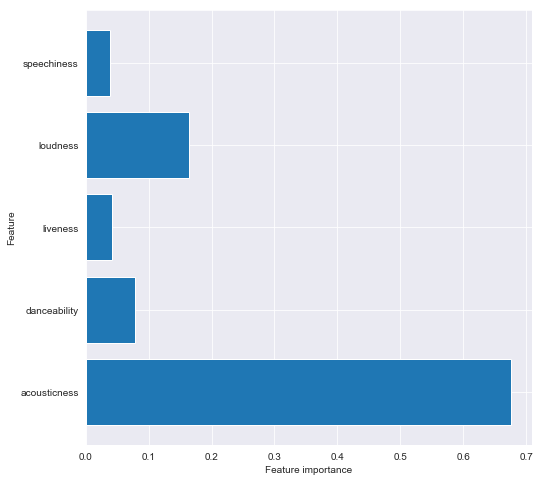

In [28]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rfc)

We will use accuracy as the evaluation metric for these machine learning models because we want to know out of all the classifications, how many were classified correctly. Accuracy is how close our measurement is to the real value we're trying to measure. Since we are classifying songs and many of the features don't vary too widely, we don't need to look at precision. The data is also pretty evenly balanced. 

In [29]:
from sklearn.metrics import accuracy_score
# Test accuracy
accuracies = {}

accuracy = rfc.score(X_test,y_test)*100
accuracies['Random Forest'] = accuracy
print("Test Accuracy of Random Forest Model {:.2f}%".format(accuracy))

Test Accuracy of Random Forest Model 96.67%


In [30]:
print(classification_report(y_test,y_pred,target_names=definitions)+'rfc')

              precision    recall  f1-score   support

    Cheerful       1.00      0.98      0.99        56
   Energetic       1.00      0.88      0.93        16
       Chill       0.86      1.00      0.92        18

    accuracy                           0.97        90
   macro avg       0.95      0.95      0.95        90
weighted avg       0.97      0.97      0.97        90
rfc


## K Nearest Neighbors Classifier

In [31]:
# Now let's try K nearest neighbor classifier
knn = KNeighborsClassifier(n_neighbors=2)
# Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [32]:
# Predicting the Test set results
y_pred = knn.predict(X_test)

Confusion matrix, without normalization
[[56  0  0]
 [ 0 15  1]
 [ 4  0 14]]


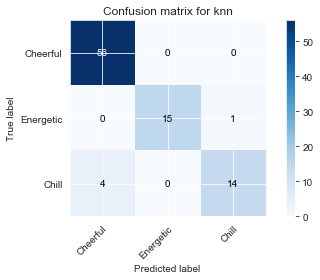

In [33]:
plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for knn')

In [34]:
accuracy = knn.score(X_test,y_test)*100
accuracies['KNN'] = accuracy
print("Test Accuracy of KNN Model {:.2f}%".format(accuracy))

Test Accuracy of KNN Model 94.44%


In [35]:
print(classification_report(y_test,y_pred,target_names=definitions)+'knn')

              precision    recall  f1-score   support

    Cheerful       0.93      1.00      0.97        56
   Energetic       1.00      0.94      0.97        16
       Chill       0.93      0.78      0.85        18

    accuracy                           0.94        90
   macro avg       0.96      0.91      0.93        90
weighted avg       0.95      0.94      0.94        90
knn


## Decision Tree Classifier

In [36]:
# Instantiate and fit a DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='gini', max_depth=5) 
DTC.fit(X_train, y_train)

# Predicting the Test set results
y_pred = DTC.predict(X_test)

In [37]:
# View features and their importance scores
features_DTC = features.columns
list(zip(features_DTC, DTC.feature_importances_))

[('acousticness', 0.9157581626748349),
 ('danceability', 0.044533469368673154),
 ('liveness', 0.0),
 ('loudness', 0.03133449444185752),
 ('speechiness', 0.008373873514634343)]

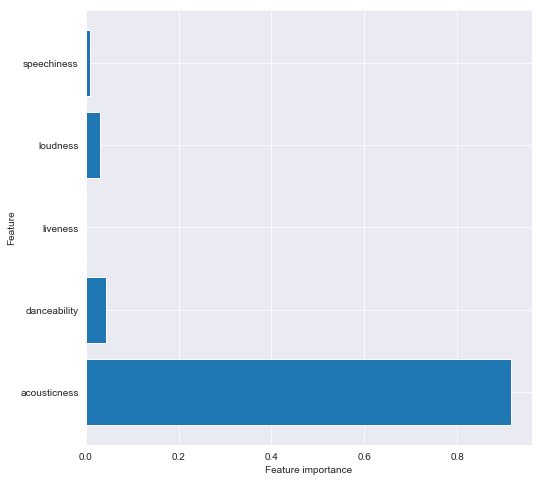

In [38]:
plot_feature_importances(DTC)

In [39]:
# Test accuracy
accuracy = DTC.score(X_test,y_test)*100
accuracies['Decision Tree'] = accuracy
print("Test Accuracy of Decision Tree Classifier Model {:.2f}%".format(accuracy))

Test Accuracy of Decision Tree Classifier Model 97.78%


In [40]:
print(classification_report(y_test,y_pred,target_names=definitions)+'DTC')

              precision    recall  f1-score   support

    Cheerful       1.00      0.98      0.99        56
   Energetic       0.94      1.00      0.97        16
       Chill       0.94      0.94      0.94        18

    accuracy                           0.98        90
   macro avg       0.96      0.98      0.97        90
weighted avg       0.98      0.98      0.98        90
DTC


## XGBoost

In [41]:
# Instantiate XGBClassifier
XGB = XGBClassifier()

# Fit XGBClassifier
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
# Accuracy of training and test sets
training_preds = XGB.predict(X_train)
test_preds = XGB.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
y_predict_xgb = XGB.predict(X_test)
y_pred_quant_xgb = XGB.predict_proba(X_test)[:, 1]
y_pred_bin_xgb = XGB.predict(X_test)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 100.0%
Validation accuracy: 96.67%


In [43]:
#set max parameters
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [44]:
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(XGB, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
y_predict_grid = grid_clf.predict(X_test)
y_pred_quant_grid = grid_clf.predict_proba(X_test)[:, 1]
y_pred_bin_grid = grid_clf.predict(X_test)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

C:\Users\isali\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7
Training Accuracy: 100.0%
Validation accuracy: 96.67%


In [45]:
accuracy = XGB.score(X_test,y_test)*100
accuracies['XGBoost'] = accuracy
print("Accuracy of XGBoost: {:.2f}%".format(accuracy))

Accuracy of XGBoost: 96.67%


In [46]:
print(classification_report(y_test,y_predict_grid,target_names=definitions)+'XGB')

              precision    recall  f1-score   support

    Cheerful       1.00      0.98      0.99        56
   Energetic       1.00      0.88      0.93        16
       Chill       0.86      1.00      0.92        18

    accuracy                           0.97        90
   macro avg       0.95      0.95      0.95        90
weighted avg       0.97      0.97      0.97        90
XGB


## Support Vector Model

In [47]:
svm = SVC(kernel='linear', random_state = 123, probability=True)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=123,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
svm.coef_

array([[-3.31661707, -0.0418406 ,  0.06236985,  1.00470242,  0.03345662],
       [-5.97841281, -1.37080364, -0.16759587,  0.98996   ,  0.19786154],
       [ 3.76462626, -1.19325325,  0.10880989, -2.04608188, -0.30990729]])

In [49]:
svm.support_vectors_

array([[0.2       , 0.489     , 0.179     , 0.65900117, 0.0274    ],
       [0.231     , 0.753     , 0.0961    , 0.83875787, 0.0973    ],
       [0.0833    , 0.601     , 0.136     , 0.42594174, 0.0344    ],
       [0.169     , 0.644     , 0.639     , 0.63664497, 0.177     ],
       [0.165     , 0.727     , 0.203     , 0.82616583, 0.0677    ],
       [0.206     , 0.574     , 0.0852    , 0.79281827, 0.0301    ],
       [0.152     , 0.946     , 0.234     , 0.58003415, 0.0584    ],
       [0.152     , 0.661     , 0.166     , 0.68904066, 0.0515    ],
       [0.176     , 0.75      , 0.0926    , 0.60383097, 0.051     ],
       [0.189     , 0.614     , 0.0911    , 0.70446057, 0.0427    ],
       [0.172     , 0.209     , 0.0843    , 0.5629602 , 0.0443    ],
       [0.145     , 0.733     , 0.0956    , 0.77019528, 0.0292    ],
       [0.099     , 0.816     , 0.372     , 0.86895742, 0.129     ],
       [0.105     , 0.924     , 0.076     , 0.60287056, 0.082     ],
       [0.215     , 0.622     , 0.

In [50]:
#Predict the response for test dataset
y_predict_svm = svm.predict(X_test)
y_pred_quant_svm = svm.predict_proba(X_test)[:, 1]
y_pred_bin_svm = svm.predict(X_test)

In [51]:
accuracy = svm.score(X_test,y_test)*100
accuracies['SVM'] = accuracy
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(accuracy))

Test Accuracy of SVM Algorithm: 95.56%


In [52]:
print(classification_report(y_test,y_predict_svm,target_names=definitions)+'svm')

              precision    recall  f1-score   support

    Cheerful       0.97      1.00      0.98        56
   Energetic       1.00      0.88      0.93        16
       Chill       0.89      0.89      0.89        18

    accuracy                           0.96        90
   macro avg       0.95      0.92      0.93        90
weighted avg       0.96      0.96      0.96        90
svm


## Naive Bayes

In [53]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
y_predict_nb = nb.predict(X_test)
y_pred_quant_nb = nb.predict_proba(X_test)[:, 1]
y_pred_bin_nb = nb.predict(X_test)

In [55]:
accuracy = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = accuracy
print("Accuracy of Naive Bayes: {:.2f}%".format(accuracy))

Accuracy of Naive Bayes: 100.00%


In [56]:
print(classification_report(y_test,y_predict_nb,target_names=definitions)+'nb')

              precision    recall  f1-score   support

    Cheerful       1.00      1.00      1.00        56
   Energetic       1.00      1.00      1.00        16
       Chill       1.00      1.00      1.00        18

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90
nb


## Comparing Accuracy of Machine Learning Models

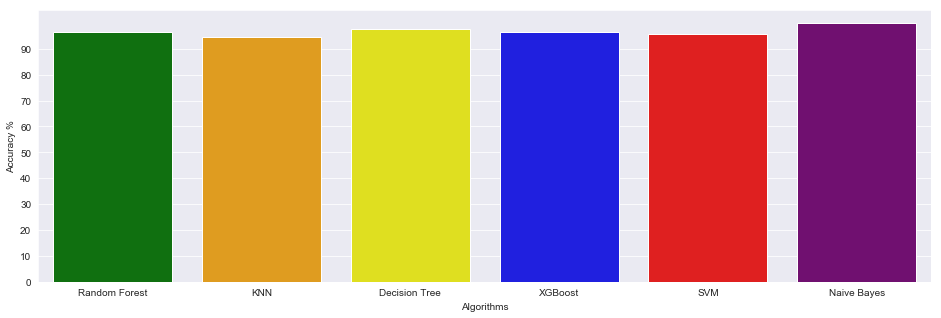

In [57]:
colors = ["green", "orange", "yellow", "blue", "red","purple"]

sns.set_style("darkgrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [58]:
accuracies

{'Random Forest': 96.66666666666667,
 'KNN': 94.44444444444444,
 'Decision Tree': 97.77777777777777,
 'XGBoost': 96.66666666666667,
 'SVM': 95.55555555555556,
 'Naive Bayes': 100.0}

Our XGBoost model performed the best at 94.4% accuracy! 

## Deep Learning using MLP Classifier

Now, instead of performing manual machine learning algorithms, we will try using the MLP Classifier from sklearn! Documentation can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
<br/> <br/>
MLP stands for Multi-layer Perceptron classifier and it is one of the simplest and easiest neural networks to implement for classification. Unlike other classification algorithms (such as Support Vectors or Naive Bayes Classifier) MLPClassifier relies on an underlying Neural Network to perform the task of classification. This model optimizes the log-loss function using LBFGS or stochastic gradient descent.  

In [59]:
# Implement MLP Classifier 
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\isali\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [60]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[56  0  0]
 [ 0 14  2]
 [ 3  0 15]]


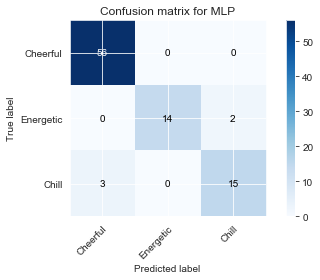

In [61]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [62]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

    Cheerful       0.95      1.00      0.97        56
   Energetic       1.00      0.88      0.93        16
       Chill       0.88      0.83      0.86        18

    accuracy                           0.94        90
   macro avg       0.94      0.90      0.92        90
weighted avg       0.94      0.94      0.94        90
MLP


We can see that our MLP classifier performed well with an accuracy of 97%. This means are model is probably overfitted, but due to time restraints, I will leave tweaking the model for future work. 

## Future Work

In the future, I would like to analyze my personal spotify preferences throughout the years to see if my music taste is changing over time. This would help my recommendations to evolve so that I can be introduced to new artists and expand my music tastes. 

In [61]:
izzy2018_df = pd.read_csv('izzy2018_df.csv')
izzy2019_df = pd.read_csv('izzy2019_df.csv')
bestofdecade_df = pd.read_csv('bestofdecade_df.csv')

## My 2018 Moods

In [62]:
izzy2018_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Let Me Down Easy,0.22000,0.672,0.899,0.142,-6.878,0.0323,139.010,0.927
1,Nice For What,0.09340,0.567,0.913,0.114,-6.471,0.0736,93.350,0.792
2,Paris in the Rain,0.77100,0.426,0.408,0.394,-9.419,0.0524,76.309,0.528
3,Slow (feat. Noah Cyrus) - CID Remix,0.00381,0.547,0.901,0.682,-3.627,0.0512,125.854,0.257
4,Kick On,0.00989,0.322,0.769,0.185,-5.858,0.0371,144.480,0.508


In [63]:
izzy2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
track           100 non-null object
acousticness    100 non-null float64
danceability    100 non-null float64
energy          100 non-null float64
liveness        100 non-null float64
loudness        100 non-null float64
speechiness     100 non-null float64
tempo           100 non-null float64
valence         100 non-null float64
dtypes: float64(8), object(1)
memory usage: 7.1+ KB


In [64]:
izzy2018_df.describe()

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.236116,0.657530,0.621010,0.185413,-6.949190,0.106381,121.785240,0.506907
std,0.245601,0.151544,0.167355,0.147916,2.656847,0.113218,27.199954,0.214570
min,0.000047,0.240000,0.116000,0.046300,-18.564000,0.024600,76.309000,0.069000
25%,0.035075,0.557750,0.497750,0.099200,-8.486250,0.037625,100.643500,0.349250
50%,0.143500,0.675500,0.628500,0.114000,-6.765500,0.055900,120.006500,0.498500
75%,0.385750,0.775500,0.746250,0.221500,-5.095750,0.121750,139.919750,0.642500
max,0.952000,0.939000,0.942000,0.874000,-2.420000,0.681000,200.040000,0.968000


In [65]:
#izzy2018_df = izzy2018_df.drop(['energy','valence','tempo'],axis=1)
#izzy2018_df.head()

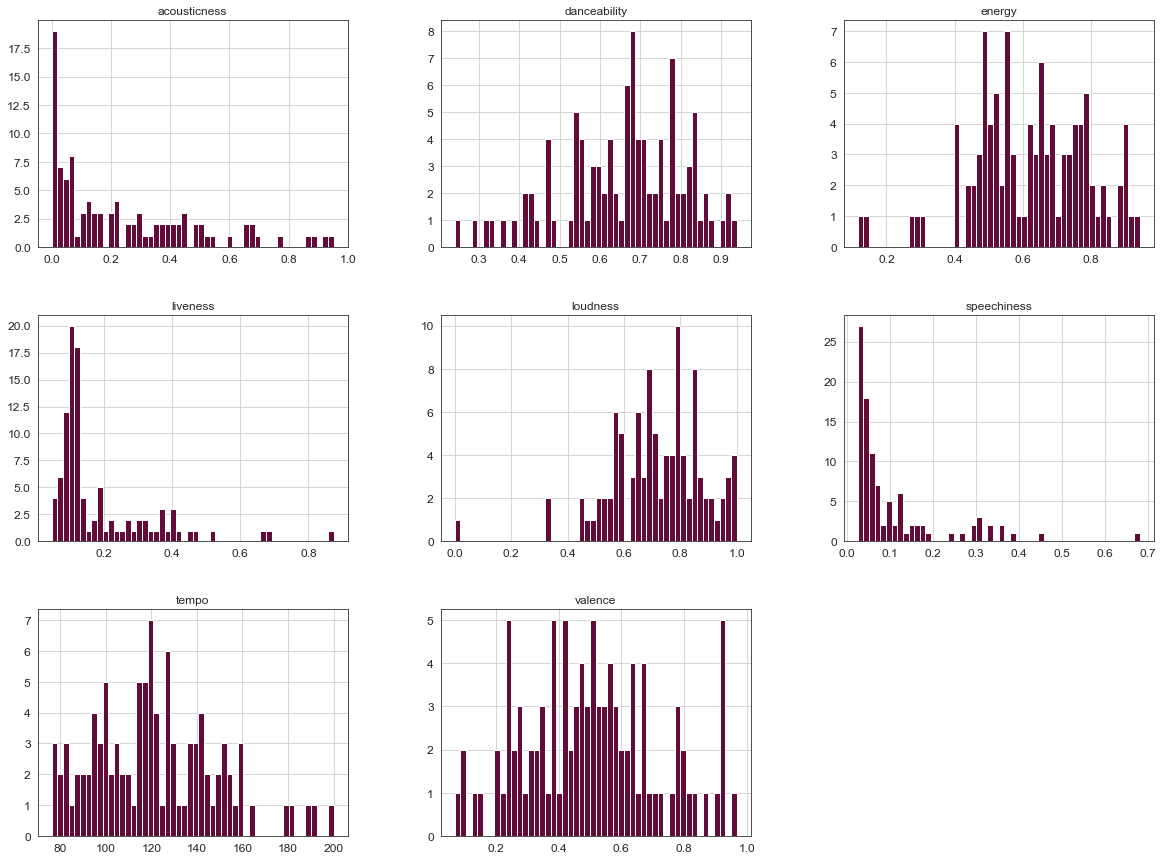

In [66]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too

loudness = izzy2018_df[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
izzy2018_df['loudness'] = pd.DataFrame(loudness_scaled)

izzy2018_df.hist(bins=50,figsize=(20,15));

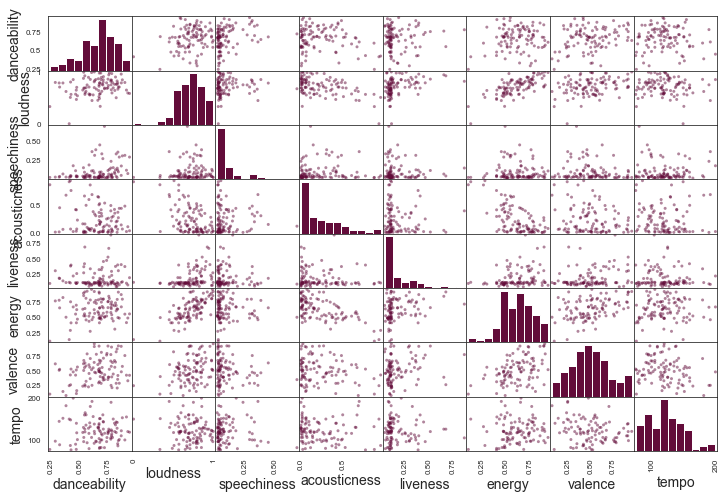

In [67]:
# attributes should contain the features we want to compare
attributes = ['danceability','loudness','speechiness','acousticness','liveness','energy','valence','tempo']

scatter_matrix(izzy2018_df[attributes],figsize=(12,8));

In [68]:
# remove song names before clustering
features = izzy2018_df.copy()
features = izzy2018_df.drop(['track'],axis=1)

In [69]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

In [70]:
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5648643049532183)
For n_clusters = 3, silhouette score is 0.5566670967753737)
For n_clusters = 4, silhouette score is 0.6065764993110844)
For n_clusters = 5, silhouette score is 0.5957784625370371)
For n_clusters = 6, silhouette score is 0.5837246207205465)
For n_clusters = 7, silhouette score is 0.586167124826762)
For n_clusters = 8, silhouette score is 0.5758271154172876)
For n_clusters = 9, silhouette score is 0.5691128313913072)
For n_clusters = 10, silhouette score is 0.5795058753148509)
For n_clusters = 11, silhouette score is 0.5816729017598569)
For n_clusters = 12, silhouette score is 0.5663898764667188)
For n_clusters = 13, silhouette score is 0.5597378601342691)
For n_clusters = 14, silhouette score is 0.5511751916337143)


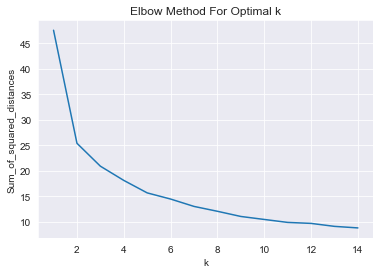

In [401]:
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [72]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [73]:
# PCA to reduce our data to 2 dimensions for visualisation

y_kmeans = kmeans.predict(features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

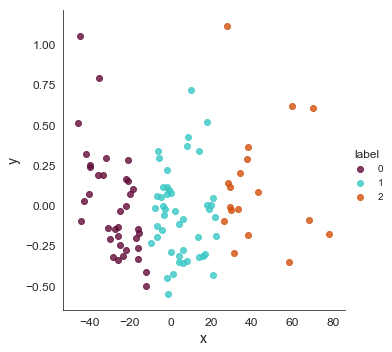

In [83]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [75]:
 #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(features)

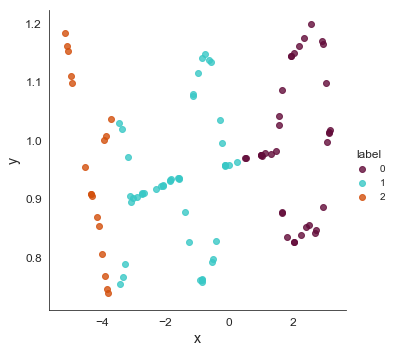

In [76]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [77]:
pca.explained_variance_ratio_

array([9.99707858e-01, 1.35733084e-04])

In [78]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=features.columns,index = ['PC-1','PC-2']))

      acousticness  danceability    energy  liveness  loudness  speechiness  \
PC-1     -0.000864     -0.000100  0.000521 -0.000272 -0.000468    -0.000103   
PC-2      0.657518     -0.163621 -0.448049 -0.153659 -0.395319     0.004238   

         tempo   valence  
PC-1  0.999998 -0.001614  
PC-2 -0.000088 -0.400305  


In [84]:
izzy2018_df['label'] = y_kmeans

# shuffle dataset

izzy2018_df = izzy2018_df.sample(frac=1)
izzy2018_df['label'].value_counts()

1    46
0    36
2    18
Name: label, dtype: int64

In [85]:
izzy2018_df[izzy2018_df['label'] == 0]

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
25,Tell Me You Love Me,0.11700,0.762,0.797,0.2020,0.982037,0.1350,122.066,0.525,0
11,Better Not (feat. Wafia),0.27800,0.783,0.537,0.2290,0.968967,0.0749,113.977,0.392,0
48,Hell & Back,0.68500,0.382,0.498,0.1140,0.622522,0.0377,181.881,0.069,0
63,The Chain,0.01620,0.682,0.492,0.1070,0.335295,0.0569,151.016,0.398,0
82,Calypso,0.13800,0.866,0.859,0.4010,0.958684,0.0587,109.972,0.923,0
70,Snow,0.14000,0.741,0.578,0.1110,0.682916,0.0296,105.727,0.800,0
34,"The Deepest Sighs, the Frankest Shadows",0.05650,0.355,0.812,0.1410,0.786856,0.0767,151.818,0.139,0
7,Life Itself,0.01470,0.699,0.670,0.3560,0.764680,0.0347,111.988,0.556,0
3,Slow (feat. Noah Cyrus) - CID Remix,0.00381,0.547,0.901,0.6820,0.925235,0.0512,125.854,0.257,0
39,I Like It,0.09900,0.816,0.726,0.3720,0.902255,0.1290,136.048,0.650,0


In [86]:
izzy2018_df[izzy2018_df['label'] == 1]

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
80,The Ringer,0.031100,0.939,0.551,0.1920,0.584613,0.2910,118.552,0.4200,1
36,Flow,0.158000,0.529,0.626,0.1140,0.650273,0.0490,117.985,0.2310,1
16,Back Down South,0.063400,0.476,0.619,0.2580,0.702614,0.0398,117.113,0.1540,1
77,Way to be Loved,0.605000,0.583,0.515,0.0931,0.574889,0.0571,115.732,0.6030,1
38,Lucky You (feat. Joyner Lucas),0.062700,0.876,0.786,0.1270,0.847374,0.3060,153.068,0.5750,1
83,Changing Of The Seasons,0.000047,0.535,0.881,0.1100,0.876177,0.1560,129.975,0.6210,1
14,Satisfied (feat. MAX),0.007590,0.750,0.651,0.5210,0.861558,0.1210,120.055,0.9280,1
10,Chateau,0.658000,0.661,0.585,0.1020,0.452738,0.0367,129.980,0.6060,1
37,Bootleg Rascal,0.508000,0.671,0.481,0.0835,0.523600,0.0486,136.045,0.4870,1
33,ATM,0.115000,0.719,0.497,0.0898,0.675359,0.6810,81.651,0.3450,1


In [87]:
izzy2018_df[izzy2018_df['label'] == 2]

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
13,The Man,0.072700,0.606,0.942,0.0709,0.988974,0.1150,106.020,0.518,2
12,In My Feelings,0.058900,0.835,0.626,0.3960,0.788590,0.1250,91.030,0.350,2
58,Bulletproof,0.000441,0.674,0.882,0.0680,0.978258,0.0477,123.016,0.682,2
53,Good Nights (feat. Mascolo),0.443000,0.849,0.483,0.0786,0.709242,0.2910,101.015,0.282,2
5,Love Lies (with Normani),0.095600,0.708,0.648,0.1340,0.801412,0.0449,143.955,0.338,2
0,Let Me Down Easy,0.220000,0.672,0.899,0.1420,0.723860,0.0323,139.010,0.927,2
56,Stranger Things,0.443000,0.867,0.663,0.1170,0.788280,0.1780,121.978,0.481,2
75,KOD,0.210000,0.831,0.782,0.1130,0.761274,0.1500,141.869,0.199,2
21,Alone (Feat. Big Sean & Stefflon Don),0.016400,0.445,0.662,0.2190,0.852453,0.1810,200.040,0.479,2
23,Need You,0.262000,0.753,0.750,0.0928,0.737797,0.0345,117.995,0.388,2
